# Loan Application Status Prediction

## Data Description
To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
df=pd.read_csv('Loan status.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data has been imported and we can see the first 5 rows of the data using df.head() function

## EDA

In [4]:
df.shape

(614, 13)

This is the shape of data

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

These are the datatypes of each columns which includes integer, object and float values 

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the columns of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has null values

In [9]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002435,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In ApplicantIncome,CoapplicantIncome,Loan amount mean is higher than median.

Standard deviation is higher in  CoapplicantIncome column.

In few columns there is a huge difference between 75th percentile and max column which means there are oultiers.

We cannot see values of many other columns becacuse they have object data

In [10]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

This column only has two data- yes, no

In [11]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

## Converting data types

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status','Property_Area']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
    df=df.replace(np.nan,df.mean())
    

Object datatype converted and all the null values are replaced with mean

In [13]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are removed

In [15]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

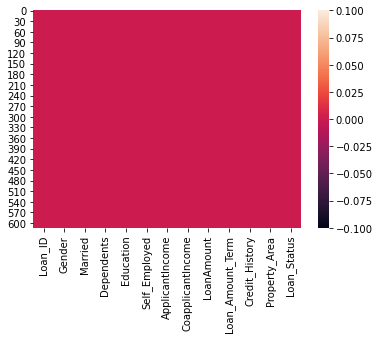

In [16]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [17]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


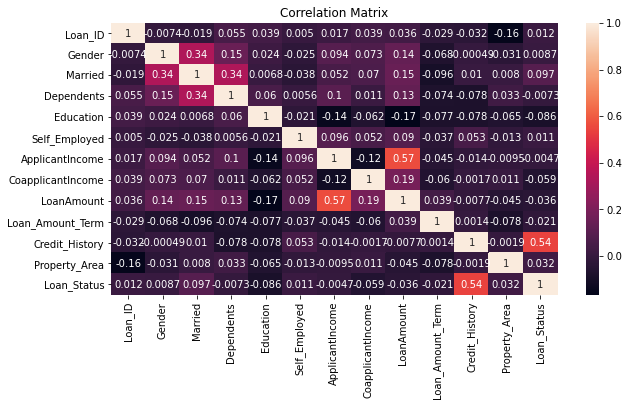

In [18]:
plt.figure(figsize=[10,5])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

StockOptionlevel and MaritalStatus are negatively correlated to each other

PercentSalaryHike and PerformanceRating are positively correlated to each other

Joblevel and YearsinCurrentRole are highly correlated with each other

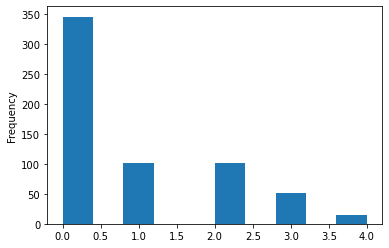

In [63]:
df['Dependents'].plot.hist()

Dependents with 0.0 to 0.4 has highest frequency

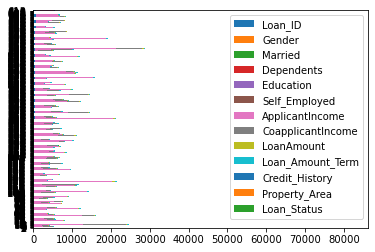

In [19]:
df.plot.barh(stacked=True)

Horizontal Bar graph

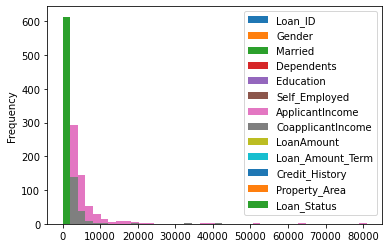

In [26]:
df.plot.hist(bins=40)

Loan_status has the highest frequency  of 0 and 1.

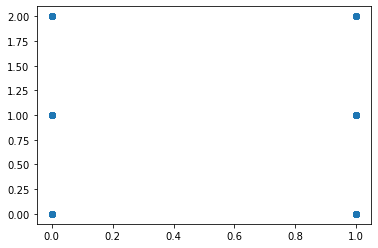

In [67]:
plt.scatter(df['Education'],df['Self_Employed'])

The scatter plot stating the relation of Education and Loan Self_Employed

In [27]:
collist=df.columns.values
ncol=35
nrows=11

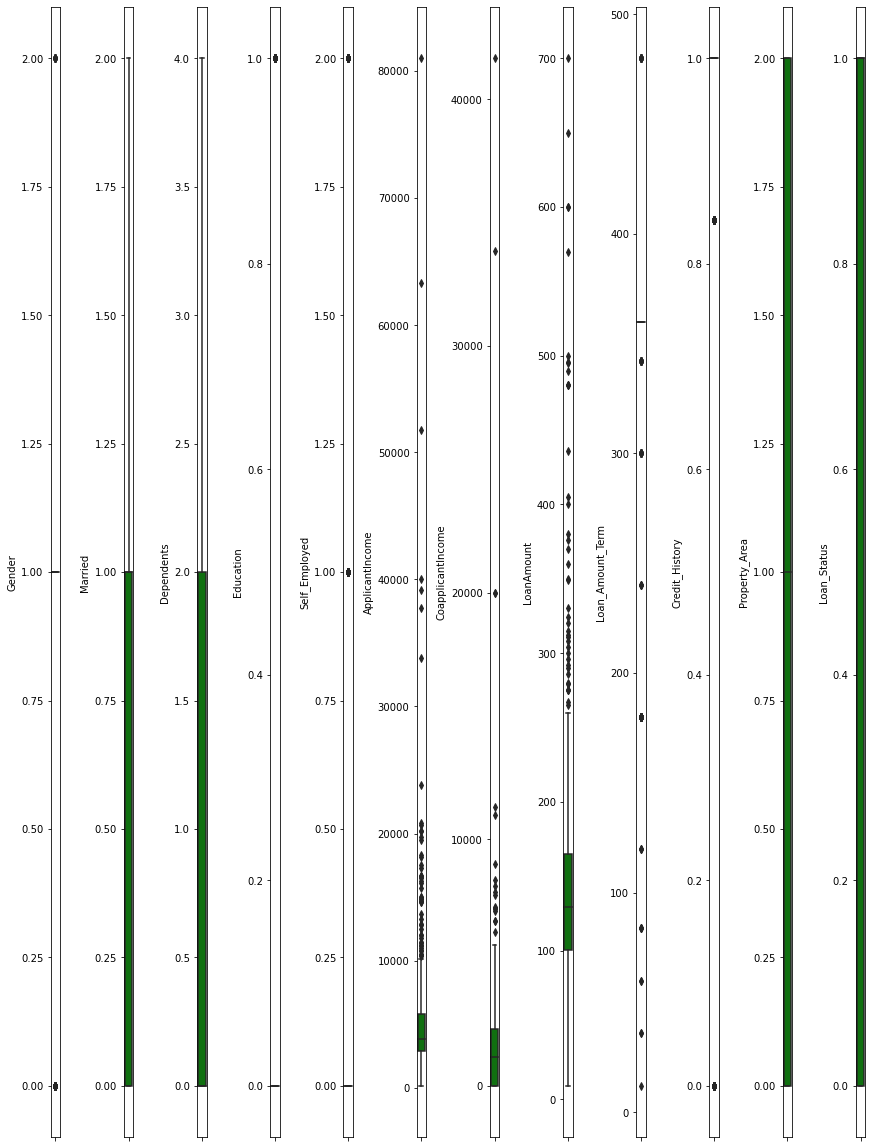

In [28]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

There are few outliers in data

In [20]:
x=df.drop("Loan_Status",axis=1)

In [21]:
y=df["Loan_Status"]

In [22]:
x.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

There are skewness in Dependents, Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount and few other coumns

## Removing skewness

In [23]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [24]:
df_new.skew()

Loan_ID             -0.287022
Gender               0.222596
Married             -0.310754
Dependents           0.376295
Education            1.367622
Self_Employed        1.620854
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.158267
dtype: float64

Skewness Removed

In [25]:
x=df_new

Checking Outliers using boxplot

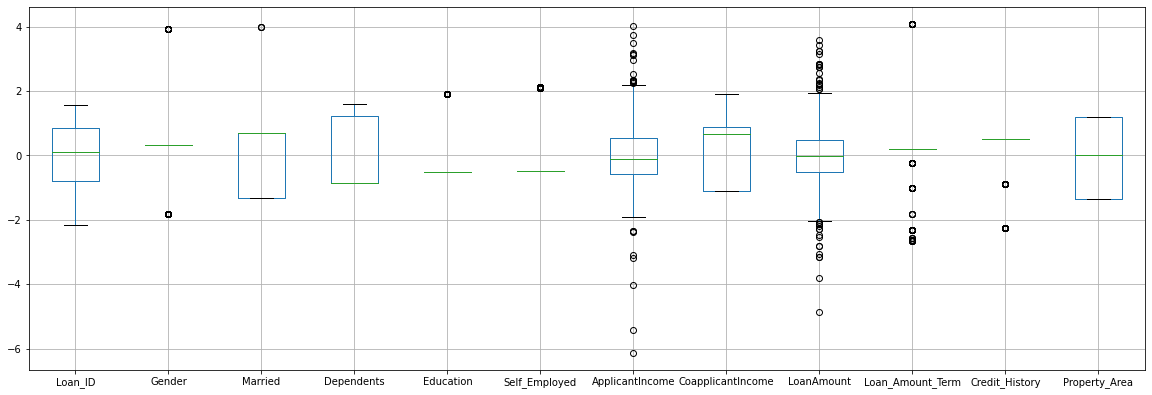

In [26]:
x.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in ApplicantIncome, LoanAmount, Credit_History,Gender,MArried, Education,Self_employed

## Removing Outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[2.15624076, 0.31016067, 1.33546089, ..., 0.18590509, 0.51406263,
        1.1935668 ],
       [2.1312907 , 0.31016067, 0.68470219, ..., 0.18590509, 0.51406263,
        1.35000343],
       [2.10987278, 0.31016067, 0.68470219, ..., 0.18590509, 0.51406263,
        1.1935668 ],
       ...,
       [1.5456009 , 0.31016067, 0.68470219, ..., 0.18590509, 0.51406263,
        1.1935668 ],
       [1.54994198, 0.31016067, 0.68470219, ..., 0.18590509, 0.51406263,
        1.1935668 ],
       [1.554281  , 1.80965324, 1.33546089, ..., 0.18590509, 2.2471956 ,
        0.00236103]])

In [28]:
threshold=3
print(np.where(z>3))

(array([ 14,  23,  75,  94, 104, 109, 126, 130, 130, 133, 155, 155, 168,
       171, 171, 171, 179, 185, 188, 188, 216, 228, 228, 248, 293, 298,
       314, 333, 334, 358, 366, 369, 378, 409, 435, 443, 460, 467, 468,
       477, 500, 500, 507, 516, 555, 561, 568, 573, 576, 588, 592, 600],
      dtype=int64), array([8, 1, 9, 8, 2, 9, 1, 8, 9, 8, 6, 8, 9, 1, 6, 8, 9, 6, 1, 6, 6, 2,
       9, 9, 9, 9, 1, 6, 1, 9, 9, 8, 9, 6, 2, 6, 1, 1, 6, 1, 6, 9, 1, 9,
       8, 8, 8, 9, 1, 1, 1, 6], dtype=int64))


In [29]:
z[14][8]

3.817843196667839

In [30]:
z[104][2]

3.98056589083748

In [31]:
z[600][6]

4.035495844745323

In [32]:
df_av=x[(z<3).all(axis=1)]

In [33]:
df_new.shape

(614, 12)

In [34]:
df_av.shape

(569, 12)

All outliers are removed now our data is clean

## Finding the best Random_State

In [35]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8648648648648649  on Random_state 158


## Creating train-test split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=158)

In [37]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [38]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.8324324324324325
[[ 31  20]
 [ 11 123]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        51
           1       0.86      0.92      0.89       134

    accuracy                           0.83       185
   macro avg       0.80      0.76      0.78       185
weighted avg       0.83      0.83      0.83       185



Accuracy_score of SVC() is :
0.8702702702702703
[[ 27  24]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        51
           1       0.85      1.00      0.92       134

    accuracy                           0.87       185
   macro avg       0.92      0.76      0.81       185
weighted avg       0.89      0.87      0.86       185



Accuracy_score of DecisionTreeClassifier() is :
0.8
[[ 30  21]
 [ 16 118]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        51
         

Support Vector Classifier has highest accuracy compared to others

## Cross validation

In [39]:
svr=SVC()

In [40]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.8061841929894709


In [43]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(svrscores.mean())

0.8061841929894709


In [44]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.8061841929894709


In [45]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.6954151672664268


In [46]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.7980141276822604


In [47]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.7932027189124351


Cross validation scores can be observed

Minimum difference in accuracy_score and cross validation is for KNeighbors Classifiers(2)

## Hyper parameter Tunning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [50]:
parameters= {'n_neighbors':np.arange(2,15),
            'weights':['uniform','distance']}

In [51]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [53]:
GCV.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [54]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [55]:
accuracy_score(y_test,GCV_pred)

0.8432432432432433

## AUC_ROC Curve

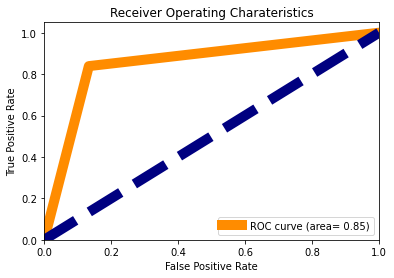

In [60]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(predm,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics')
plt.legend(loc="lower right" )
plt.show()

## Saving the best Model

In [61]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']